In [47]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import wilcoxon

In [48]:
data = pd.read_csv('C:\\Users\\Hannah\\Documents\\electrophysiology\\data\\mean_fr_summary_updated.csv',skiprows=1) #can add skiprows=1 if first row is metadata

In [49]:
print(data)

          date  file               id       state  firing_rate       comments  \
0   2026_02_05     8  2026_02_05_0008  stationary     6.916667  with pressure   
1   2026_02_05     7  2026_02_05_0007  stationary     8.249631  with pressure   
2   2026_02_05     4  2026_02_05_0004  stationary     2.622490  with pressure   
3   2026_02_03     3  2026_02_03_0003  stationary     4.869565  with pressure   
4   2026_01_27     3  2026_01_27_0003  stationary     2.817625  with pressure   
5   2026_01_24     4  2026_01_24_0004  stationary     8.578652  with pressure   
6   2026_01_24     1  2026_01_24_0001  stationary     9.390769  with pressure   
7   2026_01_23     5  2026_01_23_0005  stationary     4.804533    no pressure   
8   2026_01_22     7  2026_01_22_0007  stationary     2.304281    no pressure   
9   2026_02_05     8  2026_02_05_0008      moving     5.077626  with pressure   
10  2026_02_05     7  2026_02_05_0007      moving     8.634483  with pressure   
11  2026_02_05     4  2026_0

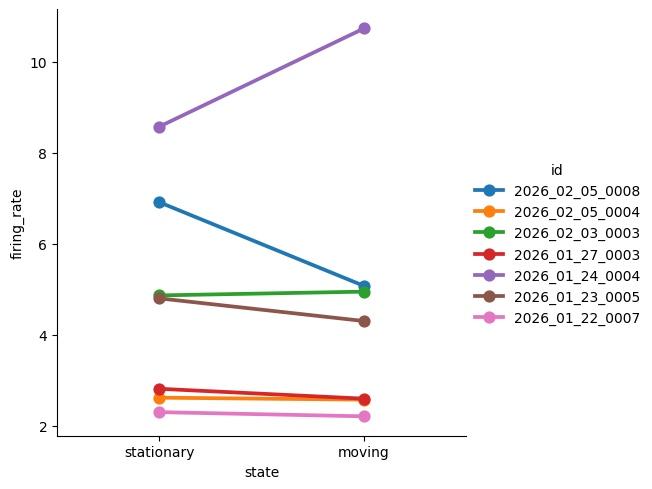

In [40]:
p = sns.catplot(data=data,x='state',y='firing_rate',hue='id',kind='point')
p.savefig("C:\\Users\\Hannah\\Documents\\electrophysiology\\data\\firing_rate_moving.png")

In [41]:
# pivot to wide format
data_wide = data.pivot(index='id', columns='state', values='firing_rate')

print(data_wide)

state               moving  stationary
id                                    
2026_01_22_0007   2.212435    2.304281
2026_01_23_0005   4.306322    4.804533
2026_01_24_0004  10.736842    8.578652
2026_01_27_0003   2.600000    2.817625
2026_02_03_0003   4.952381    4.869565
2026_02_05_0004   2.579235    2.622490
2026_02_05_0008   5.077626    6.916667


In [42]:
from scipy.stats import shapiro

diff = data_wide['moving'] - data_wide['stationary']
stat, p = shapiro(diff)

print(f"Shapiro p = {p:.4f}")

Shapiro p = 0.1864


In [43]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(data_wide['moving'],
                          data_wide['stationary'])

print(f"T = {t_stat:.3f}, p = {p_val:.5f}")

T = -0.144, p = 0.89016


In [44]:
import numpy as np

n = len(data_wide)
d = t_stat / np.sqrt(n)
print("Cohen's d =", d)

Cohen's d = -0.05445474515545378


In [45]:
from scipy.stats import wilcoxon
import scipy.stats as stats
# Perform the Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(data_wide["moving"], data_wide["stationary"])

# Print the results
print(f"Wilcoxon signed-rank test statistic: {stat}")
print(f"P-value: {p_value}")

Wilcoxon signed-rank test statistic: 9.0
P-value: 0.46875


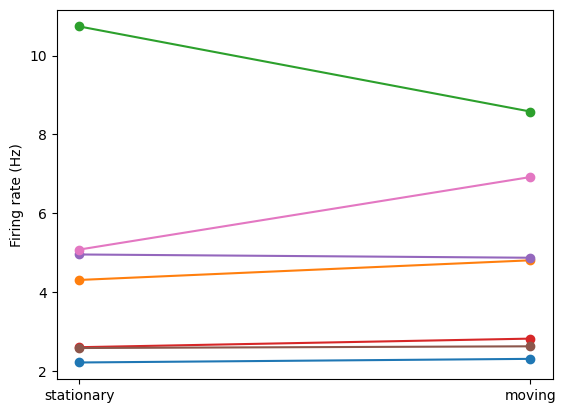

In [46]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(data_wide.T, marker='o')
plt.xticks([0,1], ['stationary','moving'])
plt.ylabel("Firing rate (Hz)")
plt.show()

In [57]:
early_data = data[data["time"] == "early"]
late_data = data[data["time"] == "late"]

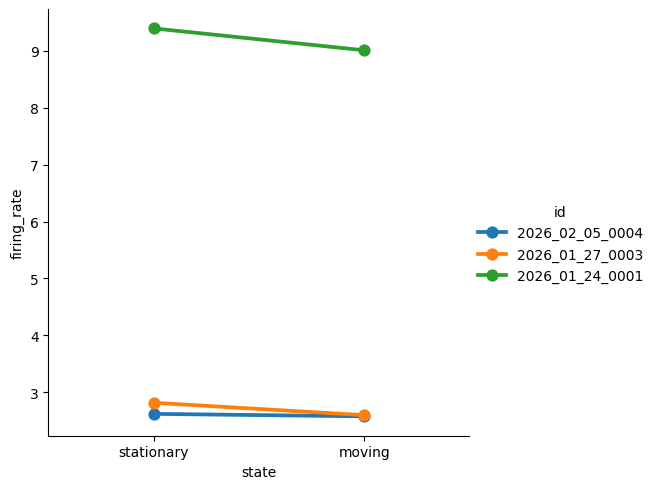

In [55]:
p = sns.catplot(data=early_data,x='state',y='firing_rate',hue='id',kind='point')

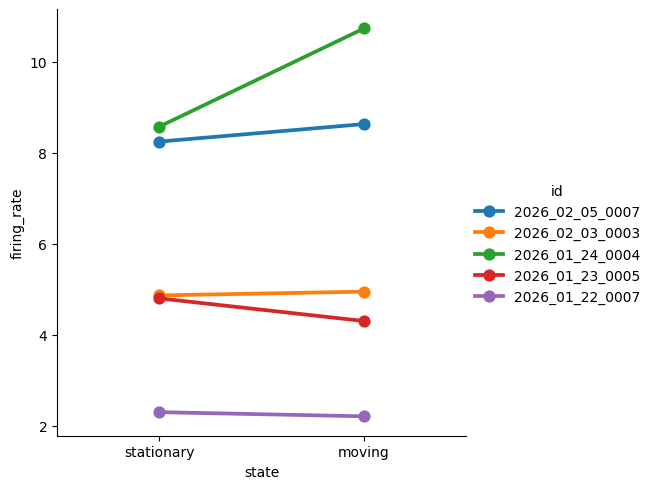

In [58]:
p = sns.catplot(data=late_data,x='state',y='firing_rate',hue='id',kind='point')